# Load

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5

C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5


In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [5]:
'''od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')'''

"od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')"

In [6]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [7]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ASUS' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


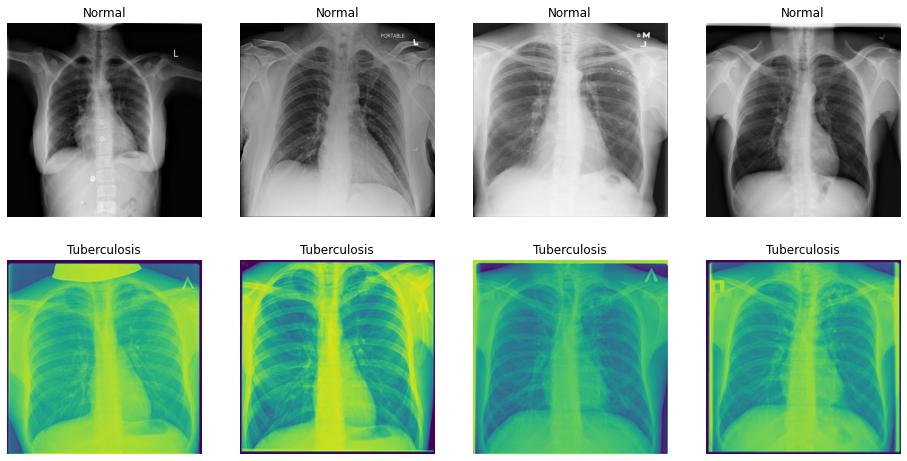

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
#pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [14]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test"

In [15]:
height = 100
width = 100
batch_size = 32

# Preprocessing Khusus Noise

In [16]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #np.clip(img, 0., 255.)
    return img

In [17]:
#Testing Generator Both
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      preprocessing_function=add_noise,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')


Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


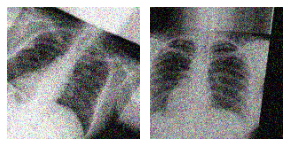

In [18]:
#tampilkan Data Generator Khusus add_noise
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
for i in range(2):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

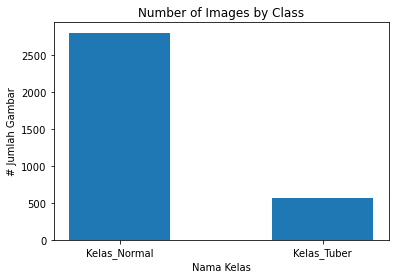

In [19]:
number_classes = {
'Kelas_Normal': len(os.listdir(train_normal_dir)),
'Kelas_Tuber': len(os.listdir(train_tuber_dir))}



plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Nama Kelas');
plt.ylabel('# Jumlah Gambar');

# Modelling

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [26]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Flatten, Concatenate, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Answer Model pertama menggabungkan minimal 2 kombinasi pretrained architecture

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam

In [36]:
baseModel_VGG16 = VGG16(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")

baseModel_VGG19 = VGG19(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")

for layer in baseModel_VGG16 .layers:
    layer._name = layer._name + str('_16')
    layer.trainable = False

for layer in baseModel_VGG19 .layers:
    layer._name = layer._name + str('_19')
    layer.trainable = False
    
inp = Input((150,150,3))
vgg16_x = Flatten()(baseModel_VGG16 (inp))
vgg19_x = Flatten()(baseModel_VGG19(inp))
x = Concatenate()([vgg16_x, vgg19_x])
x = Dropout(0.5)(x)
x = Dense(1024,kernel_regularizer=regularizers.l2(0.00001), activation='relu')(x)
out = Dense(2, activation='softmax')(x)


In [37]:
model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 4, 4, 512)    14714688    input_6[0][0]                    
__________________________________________________________________________________________________
vgg19 (Functional)              (None, 4, 4, 512)    20024384    input_6[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 8192)         0           vgg16[0][0]                      
____________________________________________________________________________________________

In [39]:
model.compile(optimizer=Adam(lr=1e-3,decay=0.0001/10),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [34]:
#Error
# setting Callback so we can save the best model in format h5 and i save it in my drive
"""callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
direc = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/V4_VGG16+VGG19_V1.h5'
best_model = ModelCheckpoint(direc, monitor='val_acc', verbose = 1, save_best_only = True)"""

In [42]:
H = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=10,
              validation_data=validation_generator
              #callbacks=[callbacks, best_model]
             )

Epoch 1/50
10/10 [==============================] - 186s 20s/step - loss: 0.2819 - acc: 0.8750 - val_loss: 0.3505 - val_acc: 0.8929
Epoch 2/50
10/10 [==============================] - 192s 20s/step - loss: 0.2505 - acc: 0.8900 - val_loss: 0.1958 - val_acc: 0.9238
Epoch 3/50
10/10 [==============================] - 194s 21s/step - loss: 0.2618 - acc: 0.9100 - val_loss: 0.2214 - val_acc: 0.9214
Epoch 4/50
10/10 [==============================] - 194s 21s/step - loss: 0.2409 - acc: 0.9100 - val_loss: 0.3312 - val_acc: 0.8976
Epoch 5/50
10/10 [==============================] - 194s 21s/step - loss: 0.3100 - acc: 0.8800 - val_loss: 0.2253 - val_acc: 0.9167
Epoch 6/50
10/10 [==============================] - 195s 21s/step - loss: 0.2201 - acc: 0.9150 - val_loss: 0.1494 - val_acc: 0.9476
Epoch 7/50
10/10 [==============================] - 194s 21s/step - loss: 0.2023 - acc: 0.9200 - val_loss: 0.2212 - val_acc: 0.9190
Epoch 8/50
10/10 [==============================] - 196s 21s/step - loss: 0.

In [58]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model') # path to the SavedModel directory
tflite_model = converter.convert()

OSError: SavedModel file does not exist at: C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/{saved_model.pbtxt|saved_model.pb}

In [57]:
model.save('V4_VGG16_VGG19_V1.h5')

ValueError: The target structure is of type `<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>`
  KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_4'), name=...
However the input structure is a sequence (<class 'list'>) of length 0.
  []
nest cannot guarantee that it is safe to map one to the other.

In [56]:
import json
from tensorflow.keras.models import load_model
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/V4_VGG16_VGG19_V1.h5')

ValueError: The target structure is of type `<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>`
  KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_4'), name=...
However the input structure is a sequence (<class 'list'>) of length 0.
  []
nest cannot guarantee that it is safe to map one to the other.

In [55]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/'
model_saved = load_model(target_dir +'V4_VGG16_VGG19_V1.h5')

OSError: SavedModel file does not exist at: C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/V4_VGG16_VGG19_V1.h5/{saved_model.pbtxt|saved_model.pb}

In [44]:
baseModel_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4_16 (InputLayer)      [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1_16 (Conv2D)     (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2_16 (Conv2D)     (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool_16 (MaxPooling2D (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1_16 (Conv2D)     (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2_16 (Conv2D)     (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool_16 (MaxPooling2D (None, 37, 37, 128)       0     

In [45]:
baseModel_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5_19 (InputLayer)      [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1_19 (Conv2D)     (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2_19 (Conv2D)     (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool_19 (MaxPooling2D (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1_19 (Conv2D)     (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2_19 (Conv2D)     (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool_19 (MaxPooling2D (None, 37, 37, 128)       0     

# Plotting

In [46]:
!pip3 install numpy
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

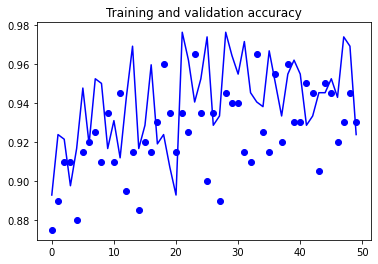

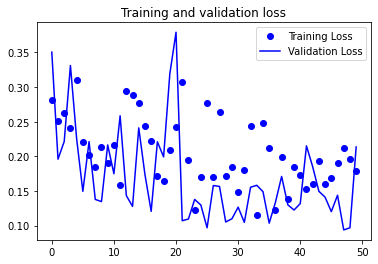

In [47]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [50]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='categorical')

Found 420 images belonging to 2 classes.


In [51]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/'
model_saved = load_model(target_dir +'V4_VGG16+VGG19_V1.h5')

ValueError: No model found in config file.

In [ ]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

In [ ]:
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()